<a href="https://colab.research.google.com/github/Venkata-Giridhar-Garikipati/stock_predictor/blob/main/Stock_Market_Prediction_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [23]:
start = '2017-01-01'
end = '2024-07-24'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [30]:
data.reset_index(inplace=True)

In [31]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,38.940498,39.481499,38.790001,39.306999,39.262321,33146000
1,2017-01-04,39.417999,39.567001,39.158001,39.345001,39.300278,21460000
2,2017-01-05,39.304001,39.723999,39.250999,39.701000,39.655872,26704000
3,2017-01-06,39.763000,40.395000,39.610199,40.307499,40.261684,32804000
4,2017-01-09,40.320000,40.498299,40.141499,40.332500,40.286655,25492000
...,...,...,...,...,...,...,...
1895,2024-07-17,184.679993,185.229996,181.619995,182.619995,182.619995,17376600
1896,2024-07-18,183.539993,184.050003,178.210007,179.220001,179.220001,17877200
1897,2024-07-19,180.369995,181.970001,178.860001,179.389999,179.389999,14485900
1898,2024-07-22,182.350006,184.300003,181.899994,183.350006,183.350006,16303900


In [32]:
ma_100_days = data.Close.rolling(100).mean()

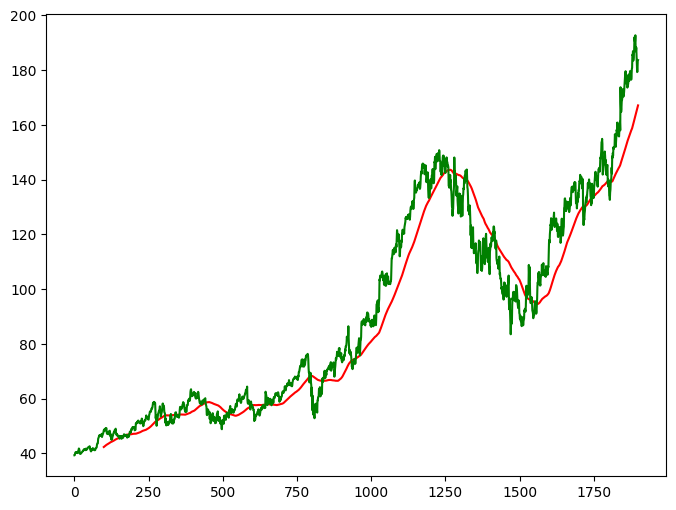

In [33]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [34]:
ma_200_days = data.Close.rolling(200).mean()

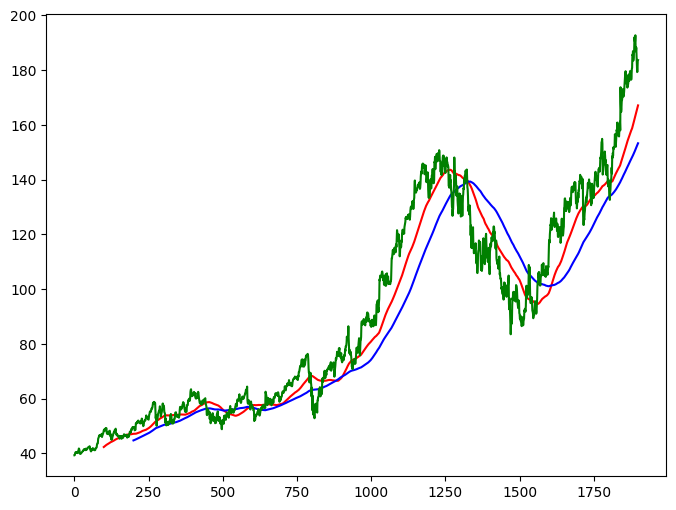

In [35]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [36]:
data.dropna(inplace=True)

In [38]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [39]:
data_train.shape[0]

1520

In [40]:
data_test.shape[0]

380

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
data_train_scale = scaler.fit_transform(data_train)

In [43]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [44]:
x, y = np.array(x), np.array(y)

In [45]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [48]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.1038
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - loss: 0.0111
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 295ms/step - loss: 0.0083
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - loss: 0.0082
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - loss: 0.0069
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - loss: 0.0066
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 294ms/step - loss: 0.0062
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - loss: 0.0075
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - loss: 0.0057
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 0.0052
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 299ms/step - loss: 0.0064
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0062
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 299ms/step - loss: 0.0054
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step - loss: 0.0054
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [50]:
pas_100_days = data_train.tail(100)

In [51]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [52]:
data_test_scale  =  scaler.fit_transform(data_test)

In [53]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [54]:
y_predict = model.predict(x)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step


In [55]:
scale =1/scaler.scale_

In [56]:
y_predict = y_predict*scale

In [57]:
y = y*scale

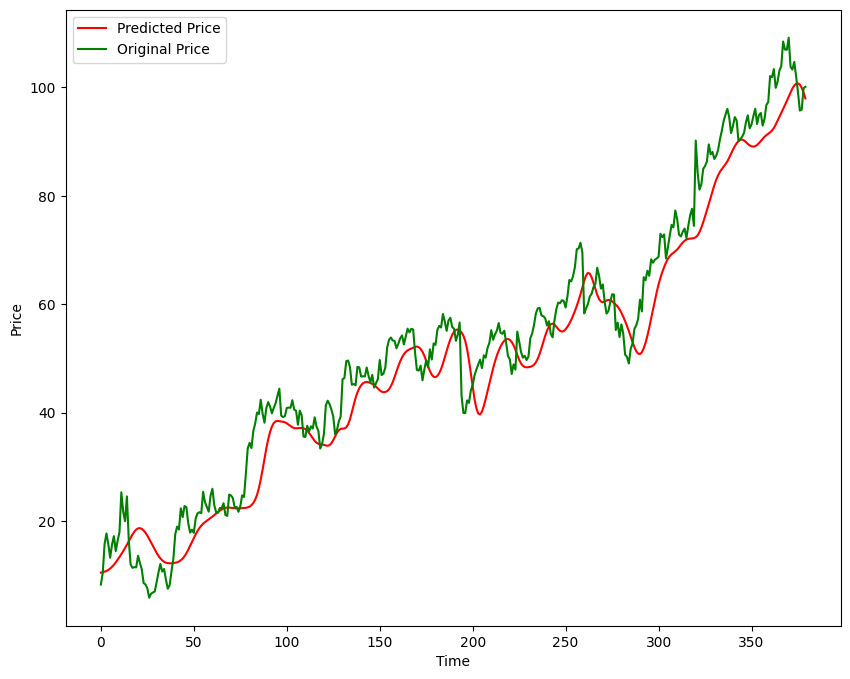

In [58]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
model.save('Stock Predictions Model.keras')